In [1]:
import pandas as pd
import numpy as np
import random as rd
import copy as cp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [2]:
def inicializaCluster(k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    return clusters

In [3]:
def inicializaCentroides(X,k):
    aux = X.tolist()
    centroides = rd.sample(aux, k)
    centroides = np.array(centroides)
    return centroides

In [4]:
def recalculate_clusters(X, centroids, k):
    clusters = inicializaCluster(k) 
    for data in X:
        distancias = []
        for i in range(k):
            distancia = np.linalg.norm(data - centroids[i])
            distancias.append(distancia)
        clusters[distancias.index(min(distancias))].append(data)
    return clusters

In [122]:
def recalculate_centroids(centroides, clusters, k):
    novo = cp.deepcopy(centroides)
    for i in range(k):
        novo[i] = np.average(clusters[i], axis=0)
    return novo

In [153]:
def kmeans(X, k):
    centroides_anterior = inicializaCentroides(X,k)
    erro = 1
    while erro != 0:
        clusters = recalculate_clusters(X, centroides_anterior, k)
        centroides_novo = recalculate_centroids(centroides_anterior, clusters, k)
        erro = np.linalg.norm(centroides_novo - centroides_anterior)
        centroides_anterior = cp.deepcopy(centroides_novo)
    return clusters, centroides_novo 

In [154]:
def elbow(X):
    Grafico = []
    for k in range(1,10):
        Sum = 0
        clusters, centroides = kmeans(X, k)
        for i in range(len(clusters)):
            for j in range(len(clusters[i])):
                distancia = np.linalg.norm(clusters[i][j] - centroides[i])
                Sum += distancia**2
        Grafico.append([k,Sum])
    Grafico = np.array(Grafico)
    
    plt.plot(Grafico[:,0],Grafico[:,1], 'bx-')
    plt.xticks(Grafico[:,0])
    plt.xlabel('k')
    plt.ylabel('Sum')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [158]:
X = pd.read_csv('cluster.dat', sep = ' ', header = None)
X = (X-X.min())/(X.max()-X.min()) #Normalizando os dados de entrada
X = X.values 

k = 3
clusters, centroides = kmeans(X, k)

cluster1 = np.array(clusters[0])
cluster2 = np.array(clusters[1])
cluster3 = np.array(clusters[2])


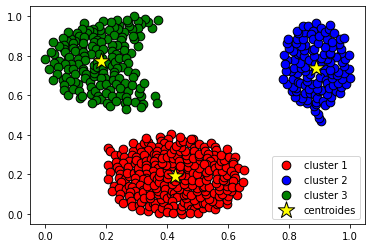

In [159]:
plt.scatter(cluster1[:,0] , cluster1[:,1],s=75, color='red',  edgecolor='black',label='cluster 1')
plt.scatter(cluster2[:,0] , cluster2[:,1],s=75, color='blue', edgecolor='black',label='cluster 2')
plt.scatter(cluster3[:,0] , cluster3[:,1],s=75, color='green',edgecolor='black',label='cluster 3')
plt.scatter(centroides[:, 0], centroides[:, 1], s=300, marker='*',c='yellow', edgecolor='black',label='centroides')

plt.legend(scatterpoints=1)
plt.show()


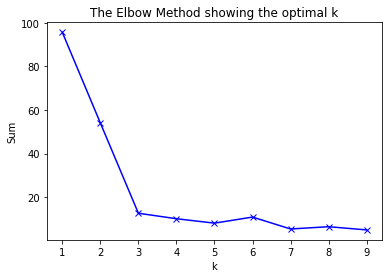

In [160]:
elbow(X)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

def silhouette_plot(X, y, n_clusters, ax):
     # Compute the silhouette scores for each sample
    silhouette_avg = silhouette_score(X, y)
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = padding = 2
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)

        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         ith_cluster_silhouette_values,
                         facecolor=color,
                         edgecolor=color)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i + 1))

        # Compute the new y_lower for next plot
        y_lower = y_upper + padding

    ax.set_xlabel("Coeficiente de Silhoutte")
    ax.set_ylabel("Cluster")

    # The vertical line for average silhoutte score of all the values
    ax.axvline(x=silhouette_avg, c='r', alpha=0.8, ls='-')
    ax.annotate('Média', xytext=(silhouette_avg, y_lower * 1.025), xy=(0, 0), c='r')

    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([0, 0.2, 0.4,0.5, 0.6, 0.8, 1])
    ax.set_ylim(0, y_upper + 1)
    ax.set_xlim(-0.075, 1.0)
    return ax

for k in range(2, 8):
    X = pd.read_csv('cluster.dat', sep = ' ', header = None)
    X = (X-X.min())/(X.max()-X.min()) #Normalizando os dados de entrada
    X = X.values 

    clusters, centroides = kmeans(X, k)
    new_clusters = []
    for i in range(len(clusters)):
        new_clusters.append([item.tolist() for item in clusters[i]])
    
    target = []
    for i in range(len(X)):
        for j in range(len(clusters)):
            if(X[i].tolist() in new_clusters[j]):
                target.append(j)
    target = np.array(target)
    
    fig, ax1 = plt.subplots(1,figsize=(6,4.5))
    ax1 = silhouette_plot(X, target, k, ax=ax1)
    
    fig.subplots_adjust(top=0.825)
    fig.suptitle(("Analise usando Método \"Silhouette\""
                  "\n$clusters={}: SIL= {}$".format(k, round(silhouette_score(X, target), 3))),
                 fontsize=13, fontweight='bold')

# KMedians

In [11]:
def inicializaClustera(k):
    clusters = {}
    for i in range(k):
        clusters[i] = []
    return clusters

def inicializaCentroidesa(X,k):
    aux = X.tolist()
    centroides = rd.sample(aux, k)
    centroides = np.array(centroides)
    return centroides

In [12]:
def recalculate_clustersa(X, centroids, k):
    clusters = inicializaCluster(k) 
    for data in X:
        distancias = []
        for i in range(k):
            distancia = np.linalg.norm(data - centroids[i])
            distancias.append(distancia)
        clusters[distancias.index(min(distancias))].append(data)
    return clusters

def recalculate_centroidsa(centroides, clusters, k):
    novo = cp.deepcopy(centroides)
    for i in range(k):
        novo[i] = np.average(clusters[i], axis=1)
    return novo

In [ ]:
#[[0.19848485 0.61397059]
#[0.23484848 0.23897059]
# [0.29545455 0.25735294]]
#A = np.array([[0.19848485,0.61397059],[0.23484848,0.23897059],[0.29545455,0.25735294]])
 [[0.06060606060606061, 0.6286764705882354], [0.4863636363636364, 0.28308823529411764], [0.12272727272727273, 0.8639705882352942]]